# The Basic Laplace Mechanism

## The Laplace Distribution

First, let's look at the Laplace Distribution:

$f\left(x\middle|\mu,b\right)=\frac{1}{2b}e^{\left(-\frac{\left|x-\mu\right|}{b}\right)}$

For implementing simple $\epsilon$-differential privacy, we'll set the location to zero: $\mu=0$. That gives us:

$f\left(x\middle|\mu,b\right)=\frac{1}{2b}e^{\left(-\frac{\left|x\right|}{b}\right)}$

Next we'll have a quick look at what the Laplace distribution looks like using some Python...

In [1]:
# Some initial Python setup requirements for later code.

# Required to get the plots inline for Census implementation.
%matplotlib inline

# Load the libraries we need.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Set the threshold for numpy output values that get printed to the screen.
np.set_printoptions(threshold=10)


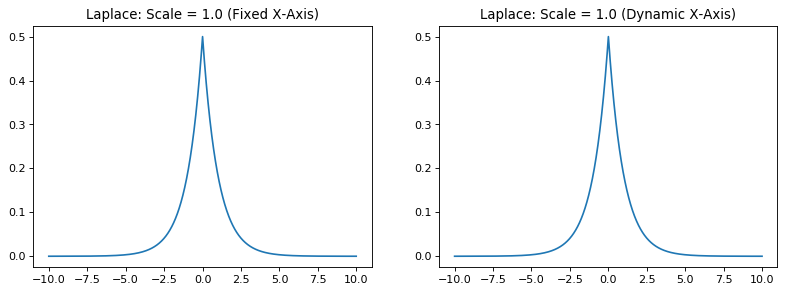

In [6]:
# Set the Laplace scale:
b = 1.

# Set up our output plot.
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

# Use a fixed plotting scale:
plotrange=10.
plotscale=0.01
# Generate the data
y = np.arange(-plotrange, plotrange, plotscale)
pdf = np.exp(-abs(y)/b)/(2.*b)
# Plot the data
plt.subplot(1,2,1)
plt.plot(y, pdf)
plt.title("Laplace: Scale = {} (Fixed X-Axis)".format(b))

# Use a dynamic plotting scale:
plotrange=10.*b
plotscale=b/100.
# Generate the data
x = np.arange(-plotrange, plotrange, plotscale)
pdf = np.exp(-abs(x)/b)/(2.*b)
# Plot the data
plt.subplot(1,2,2)
plt.plot(x, pdf)
plt.title("Laplace: Scale = {} (Dynamic X-Axis)".format(b))


plt.show()


## Sample from the Laplace Distribution
Conveniently, Python (the NumPy package, really) has a way to sample from this distribution. 

*Note: If you are using tools that don't have this facility (Excel!), you can construct a sample from the Laplace distribution by taking the difference between two independent samples of the exponential distribution.)*

Below we'll draw some samples and list and plot them:

[-0.3927485  -0.33984433  0.00351552 ..., -0.0937331  -0.05193414
  0.24754417]


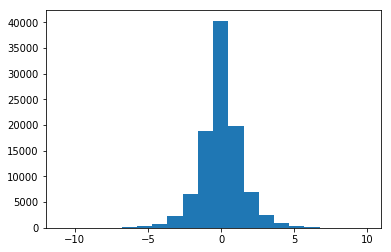

In [5]:
# Set the scale:
b = 1.

# Generate the samples 
numsamples = 100000
samples = np.random.laplace(0,b,numsamples)

# First, print the samples:
print(samples)

# Then display an histogram of the noise:
numbins=20
histnoise=plt.hist(samples,numbins)